### OPENCV 图像滤波

滤波主要为去除噪声，模糊图像，对原图像进行滤波算法，往往会使原图片变得更加模糊，主要是线性滤波。但对非线性滤波，可以在保留原图像一些细节情况下，去除噪声，达到一种美颜的效果。在进行图像处理的过程中使用滤波，可以个人感觉可以起到一种正则化的作用。

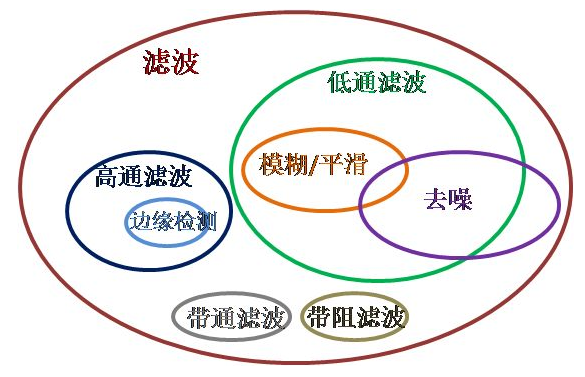

#### 线性与非线性的理解

滤波根据取值的方法，分为线性滤波和非线性滤波，线性滤波根据像素点周围像素，及领域内像素进行加权线性求和，非线性方法则不是线性相加的方式，而是如取中值的非线性方法计算中心像素的值。

#### 1.线性滤波的理解及实现

方框滤波，滤波矩阵值全为1，当归一化后就变成了均值滤波

Opencv提供的一个通用的2D滤波函数为cv2.filter2D()，滤波函数的使用需要一个核模板，对图像的滤波操作过程为：将和模板放在图像的一个像素A上，求与之对应的图像上的每个像素点的和，核不同，得到的结果不同，而滤波的使用核心也是对于这个核模板的使用，需要注意的是，该滤波函数是单通道运算的，也就是说对于彩色图像的滤波，需要将彩色图像的各个通道提取出来，对各个通道分别滤波才行。

In [2]:
#均值模糊、中值模糊、自定义模糊    模糊是卷积的一种表象
import cv2 as cv
import numpy as np

In [3]:

def blur_demo(image):      #均值模糊  去随机噪声有很好的去燥效果
    dst = cv.blur(image, (1, 15))    #（1, 15）是垂直方向模糊，（15， 1）还水平方向模糊
    cv.namedWindow('blur_demo', cv.WINDOW_NORMAL)
    cv.imshow("blur_demo", dst)



def custom_blur_demo(image):    # 用户自定义模糊
    kernel = np.ones([5, 5], np.float32)/25   #除以25是防止数值溢出 
    dst = cv.filter2D(image, -1, kernel)
    cv.namedWindow('custom_blur_demo', cv.WINDOW_NORMAL)
    cv.imshow("custom_blur_demo", dst)

src = cv.imread(r'E:\Machine Learning\OpenCV\task4.jpg')
cv.namedWindow('input_image', cv.WINDOW_NORMAL)
cv.imshow('input_image', src)

blur_demo(src)

custom_blur_demo(src)

cv.waitKey(0)
cv.destroyAllWindows()

从左到右为原图，均值模糊和自定义模糊。自定义模糊核为5*5，1/25

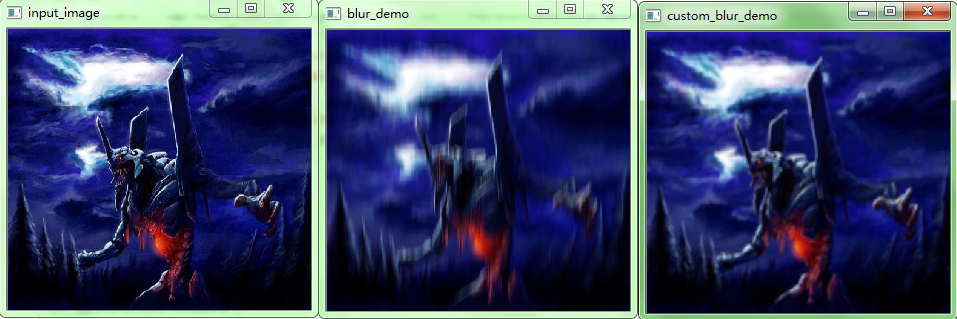

* 注意：

* 1.高斯模糊实质上就是一种均值模糊，只是高斯模糊是按照加权平均的，距离越近的点权重越大，距离越远的点权重越小。通俗的讲，高斯滤波就是对整幅图像进行加权平均的过程，每一个像素点的值，都由其本身和邻域内的其他像素值经过加权平均后得到。

* 2.高斯分布的一维和二维原理如下：

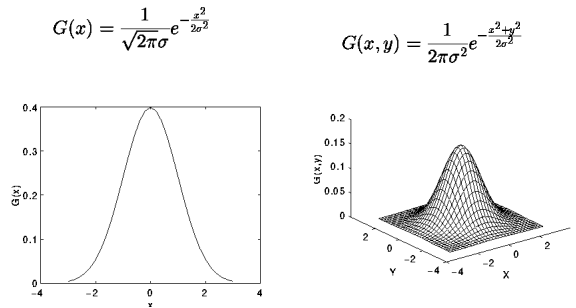

In [8]:
img = cv.imread(r'E:\Machine Learning\OpenCV\task4.jpg',0) #直接读为灰度图像
for i in range(2000): #添加点噪声
    temp_x = np.random.randint(0,img.shape[0])
    temp_y = np.random.randint(0,img.shape[1])
    img[temp_x][temp_y] = 255
blur = cv.GaussianBlur(img,(5,5),0)
cv.imshow('str',img)
cv.imshow('Gauss_Blur',blur)
cv.waitKey(0)
cv.destroyAllWindows()

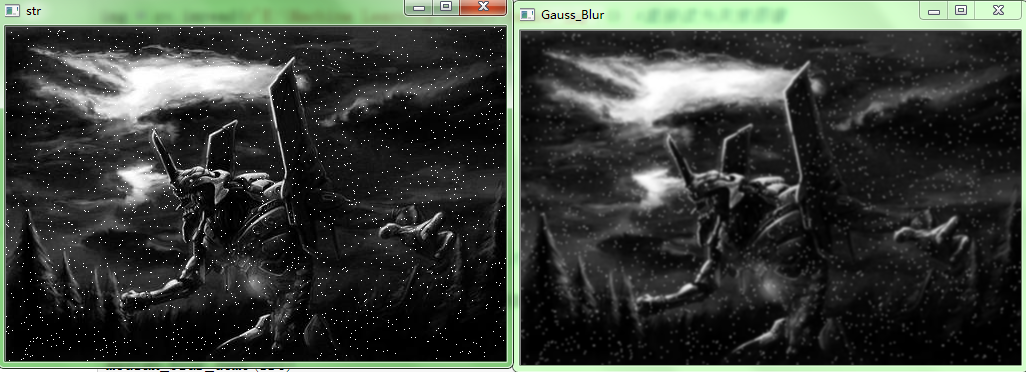

In [10]:
img = cv.imread(r'E:\Machine Learning\OpenCV\task4.jpg',0) #直接读为灰度图像
for i in range(2000): #添加点噪声
    temp_x = np.random.randint(0,img.shape[0])
    temp_y = np.random.randint(0,img.shape[1])
    img[temp_x][temp_y] = 255
blur = cv.medianBlur(img,5)
cv.imshow('str',img)
cv.imshow('median_Blur',blur)
cv.waitKey(0)
cv.destroyAllWindows()

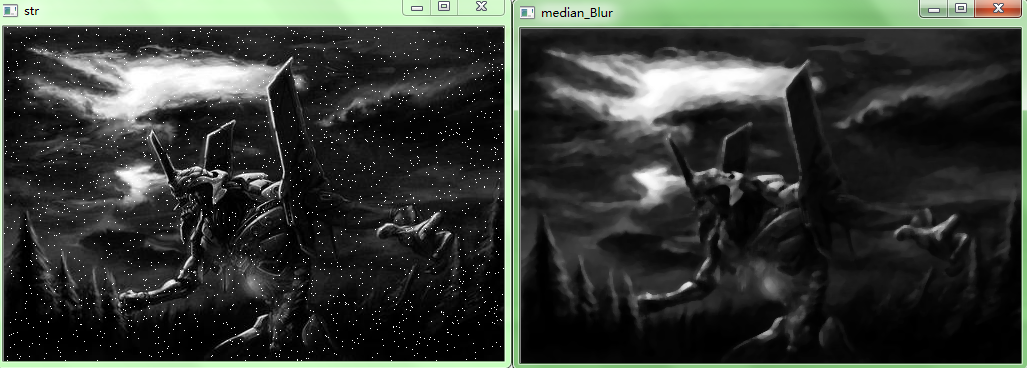

### 包边去噪滤波


1.双边滤波（Bilateral filter）是一种非线性的滤波方法，是结合图像的空间邻近度和像素值相似度的一种折中处理，同时考虑空域信息和灰度相似性，达到保边去噪的目的。双边滤波器顾名思义比高斯滤波多了一个高斯方差sigma－d，它是基于空间分布的高斯滤波函数，所以在边缘附近，离的较远的像素不会太多影响到边缘上的像素值，这样就保证了边缘附近像素值的保存。但是由于保存了过多的高频信息，对于彩色图像里的高频噪声，双边滤波器不能够干净的滤掉，只能够对于低频信息进行较好的滤波

2.双边滤波函数原型：bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst

src参数表示待处理的输入图像。

d参数表示在过滤期间使用的每个像素邻域的直径。如果输入d非0，则sigmaSpace由d计算得出，如果sigmaColor没输入，则sigmaColor由sigmaSpace计算得出。

sigmaColor参数表示色彩空间的标准方差，一般尽可能大。较大的参数值意味着像素邻域内较远的颜色会混合在一起，从而产生更大面积的半相等颜色。

sigmaSpace参数表示坐标空间的标准方差(像素单位)，一般尽可能小。参数值越大意味着只要它们的颜色足够接近，越远的像素都会相互影响。当d > 0时，它指定邻域大小而不考虑sigmaSpace。 否则，d与sigmaSpace成正比。

In [11]:
#边缘保留滤波（EPF）  高斯双边、均值迁移
import cv2 as cv
import numpy as np

def bi_demo(image):   #双边滤波
    dst = cv.bilateralFilter(image, 0, 100, 15)
    cv.namedWindow("bi_demo", cv.WINDOW_NORMAL)
    cv.imshow("bi_demo", dst)

def shift_demo(image):   #均值迁移
    dst = cv.pyrMeanShiftFiltering(image, 10, 50)
    cv.namedWindow("shift_demo", cv.WINDOW_NORMAL)
    cv.imshow("shift_demo", dst)
    
src = cv.imread(r'E:\Machine Learning\OpenCV\task4-1.jpg')
cv.namedWindow('input_image', cv.WINDOW_NORMAL)
cv.imshow('input_image', src)

bi_demo(src)
shift_demo(src)

cv.waitKey(0)
cv.destroyAllWindows()

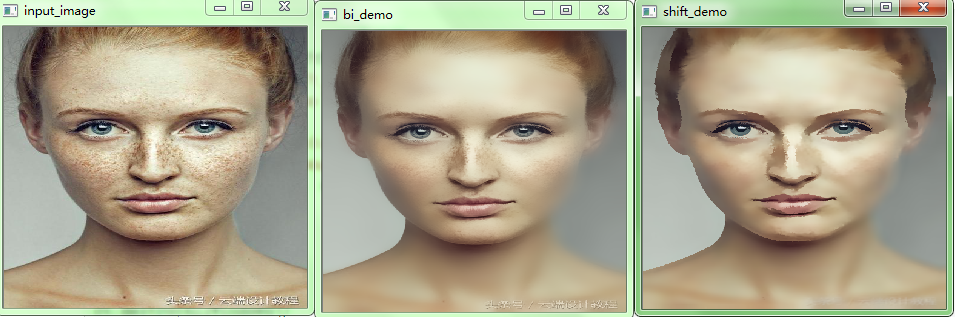